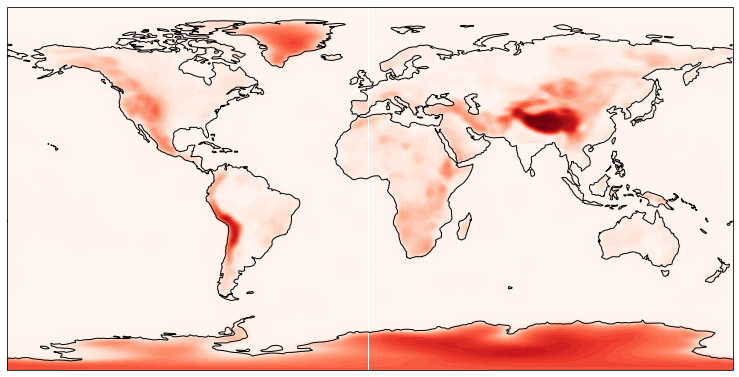

In [1]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

path  =  "/home/sun/data/cesm/restart/"

f0    =  xr.open_dataset(path+'b1850_tx4_indian_220618.cam.h0.0037-12.nc')
f1    =  xr.open_dataset(path+'b1850_tx4_indian_220618.cam.i.0038-01-01-00000.nc')
f2    =  xr.open_dataset(path+'b1850_tx4_indian_220618.cam.r.0038-01-01-00000.nc')
f3    =  xr.open_dataset(path+'b1850_tx4_indian_220618.cam.rs.0038-01-01-00000.nc')
# f0 和 f2文件里面有PHIS这个量

lat1  =  0
lat2  =  23
lon1  =  65
lon2  =  90

for i in range(len(f2.lon)):
    for j in range(len(f2.lat)):
        if (f2.lat.data[j] > lat1 and f2.lat.data[j] < lat2 and f2.lon.data[i] < lon2 and f2.lon.data[i] > lon1):
            f0.PHIS.data[0,j,i] = 0
            f2.PHIS.data[j,i]   = 0
            
proj    =  ccrs.PlateCarree()
fig,ax   =  plt.subplots(figsize=(13,10),subplot_kw=dict(projection=ccrs.PlateCarree()))
im  =  ax.contourf(f0.lon,f0.lat,f0.PHIS[0],40,cmap='Reds',alpha=1,extend='both')
ax.coastlines(resolution='110m',lw=1)

In [2]:
f0.to_netcdf(path+'output/b1850_tx4_indian_220618.cam.h0.0037-12.nc')
f2.to_netcdf(path+'output/b1850_tx4_indian_220618.cam.r.0038-01-01-00000.nc')